# Informações adicionais

## Modelagem dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('Anuário Estatístico 2019 - Evolução da produção de gás natural, por localização.csv', sep = ';', decimal = ',')

In [3]:
sudeste_onshore = dados.loc[(dados['UF'] == 'Espírito Santo') & (dados['Localização'] == 'Terra') |
                             (dados['UF'] == 'Rio de Janeiro') & (dados['Localização'] == 'Terra') | 
                             (dados['UF'] == 'São Paulo') & (dados['Localização'] == 'Terra')]
sudeste_offshore = dados.loc[(dados['UF'] == 'Alagoas') & (dados['Localização'] == 'Mar') |
                             (dados['UF'] == 'Espírito Santo') & (dados['Localização'] == 'Mar') | 
                             (dados['UF'] == 'Rio de Janeiro') & (dados['Localização'] == 'Mar') |
                             (dados['UF'] == 'São Paulo') & (dados['Localização'] == 'Mar')]
sudeste_total = dados.loc[(dados['UF'] == 'Espírito Santo')  |
                             (dados['UF'] == 'Rio de Janeiro')  | 
                             (dados['UF'] == 'São Paulo')]

In [4]:
def modelagem(n):
    n['Produção de gás natural (milhões m3)'] = n['Produção de gás natural (milhões m3)'].mul(1000000)
    n = n.rename(columns = {'Produção de gás natural (milhões m3)' : 'Produção de gás natural (m³)'})
    n = n.groupby(['Ano'])['Produção de gás natural (m³)'].sum().to_frame().reset_index()
    return n

sudeste_onshore = modelagem(sudeste_onshore)
sudeste_offshore = modelagem(sudeste_offshore)
sudeste_total = modelagem(sudeste_total)

In [5]:
def grafico(n):
    plt.figure(figsize = (10, 5))
    plt.xticks(n['Ano'])
    if n is sudeste_onshore:            
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'brown', data = sudeste_onshore)
        plt.title('Produção de gás natural onshore na região Sudeste', fontsize = 16, fontweight = 'bold')
    elif n is sudeste_offshore:
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'blue', data = sudeste_offshore)
        plt.title('Produção de gás natural offshore na região Sudeste', fontsize = 16, fontweight = 'bold')
    elif n is sudeste_total:
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'black', data = sudeste_total)
        plt.title('Produção de gás natural total na região Sudeste', fontsize = 16, fontweight = 'bold')
    plt.show()

In [6]:
sudeste_onshore_ts = copy.deepcopy(sudeste_onshore)
sudeste_offshore_ts = copy.deepcopy(sudeste_offshore)
sudeste_total_ts = copy.deepcopy(sudeste_total)

In [7]:
def time_series(time):
    time['Ano'] = pd.to_datetime(time['Ano'].astype(str), format = '%Y')
    time = time.set_index('Ano')
    return time

In [8]:
sudeste_onshore_ts = time_series(sudeste_onshore_ts) # [0, 1, 0]
sudeste_offshore_ts = time_series(sudeste_offshore_ts) # [1, 0, 1]
sudeste_total_ts = time_series(sudeste_total_ts) # [1, 0, 1]

In [9]:
#modelo_auto = auto_arima(sudeste_onshore_ts, m = 2, seasonal = False, trace = True)
#modelo_auto.summary()

In [10]:
modelo_sudeste_onshore = ARIMA(sudeste_onshore_ts, order = [0, 1, 0])
modelo_treinado_sudeste_onshore = modelo_sudeste_onshore.fit()

modelo_sudeste_offshore = ARIMA(sudeste_offshore_ts, order = [0, 0, 1])
modelo_treinado_sudeste_offshore = modelo_sudeste_offshore.fit()

modelo_sudeste_total = ARIMA(sudeste_total_ts, order = [0, 0, 1])
modelo_treinado_sudeste_total = modelo_sudeste_total.fit()

In [11]:
previsoes_onshore = modelo_treinado_sudeste_onshore.forecast(steps = 2)[0]
previsoes_offshore = modelo_treinado_sudeste_offshore.forecast(steps = 2)[0]
previsoes_total = modelo_treinado_sudeste_total.forecast(steps = 2)[0]

## Gráfico da produção de gás natural onshore e sua previsão

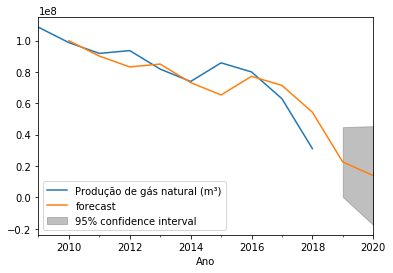

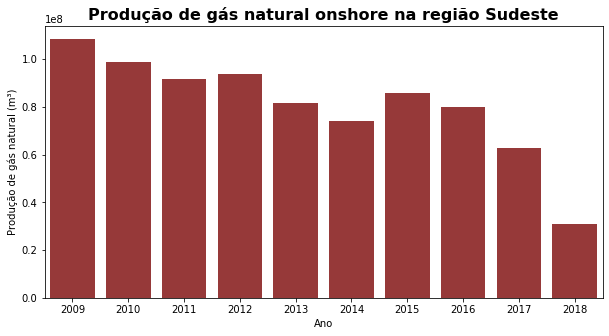

In [13]:
eixo_onshore = sudeste_onshore_ts.plot()

modelo_treinado_sudeste_onshore.plot_predict('2010-01-01', '2020-01-01', ax = eixo_onshore, plot_insample = False)
grafico(sudeste_onshore)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural onshore tende a ser de queda para os próximos 2 anos.

## Gráfico da produção de gás natural offshore e sua previsão

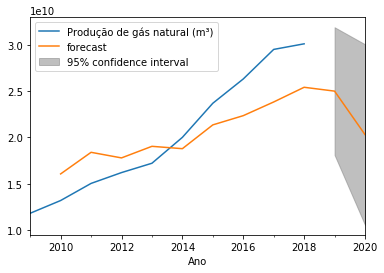

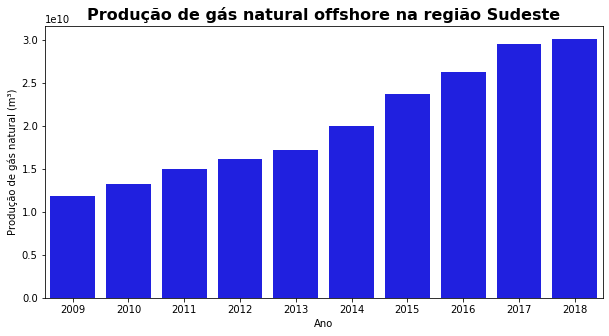

In [14]:
eixo_offshore = sudeste_offshore_ts.plot()

modelo_treinado_sudeste_offshore.plot_predict('2010-01-01', '2020-01-01', ax = eixo_offshore, plot_insample = False)
grafico(sudeste_offshore)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural offshore tende a ser e queda para os próximos 2 anos.

## Gráfico da produção de gás natural total e sua previsão

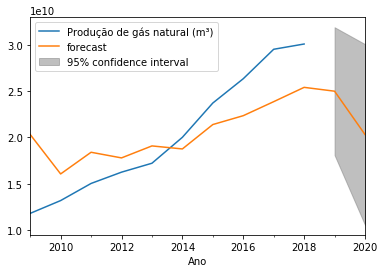

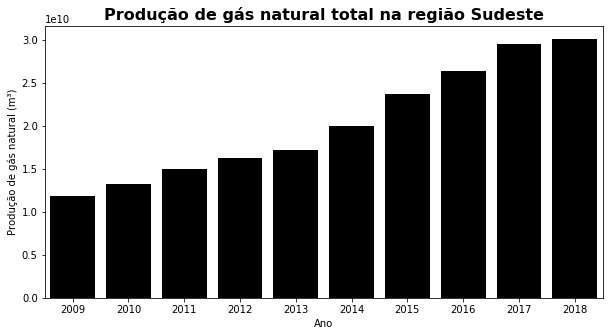

In [15]:
eixo_total = sudeste_total_ts.plot()

modelo_treinado_sudeste_total.plot_predict('2009-01-01', '2020-01-01', ax = eixo_total, plot_insample = False)
grafico(sudeste_total)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural total tende a ser de queda para os próximos 2 anos.